In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
display(train.head())
display(test.head())

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년)
0,TEST_000,P사,TayCT,Nearly New,76.093,AWD,14057,2,No,0
1,TEST_001,B사,iX,Brand New,90.000,AWD,7547,8,No,0
2,TEST_002,B사,i5,Brand New,NaN,RWD,7197,7,Yes,0
3,TEST_003,H사,ION5,Nearly New,68.479,AWD,10357,7,No,1
4,TEST_004,K사,EV6,Brand New,NaN,FWD,7597,10,No,0


In [4]:
# test.shape

In [5]:
# train.describe()

In [6]:
train.shape

(7497, 11)

C:\Users\dlago\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dlago\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dlago\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dlago\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dlago\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dlago\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48516 missing from c

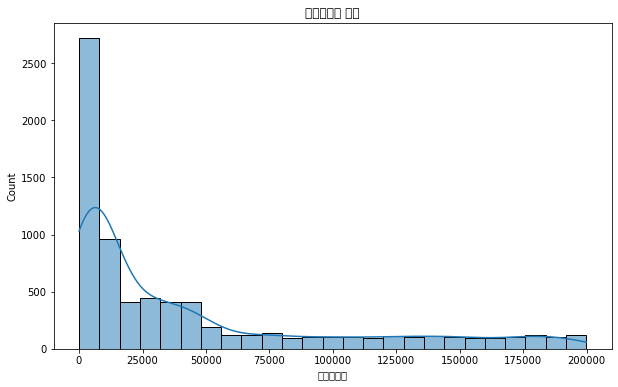

In [7]:

plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='주행거리(km)', kde=True, bins=25)

plt.xlabel('배터리용량')
plt.title('배터리용량 분포')
plt.show() 


C:\Users\dlago\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dlago\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dlago\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dlago\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dlago\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dlago\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48516 missing from c

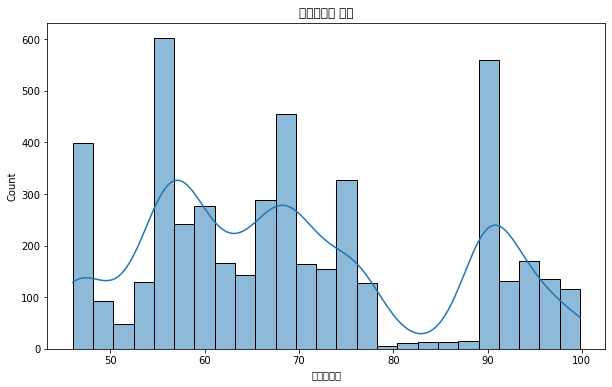

In [8]:

plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='배터리용량', kde=True, bins=25)

plt.xlabel('배터리용량')
plt.title('배터리용량 분포')
plt.show() 


In [9]:
train['배터리용량'] = train.groupby('모델')['배터리용량'].transform(lambda x: x.fillna(x.median()))
test['배터리용량'] = test.groupby('모델')['배터리용량'].transform(lambda x: x.fillna(x.median()))

In [10]:
train['배터리용량'].fillna(train['배터리용량'].median(), inplace=True)
test['배터리용량'].fillna(test['배터리용량'].median(), inplace=True)

In [11]:
#아웃라이어 제거

def is_outliers(s):
    lower_limit = s.mean() - (s.std()*3)
    upper_limit = s.mean() + (s.std()*3)
    return ~s.between(lower_limit, upper_limit)

In [12]:
train = train[~train.groupby('차량상태', group_keys=False)['가격(백만원)'].apply(is_outliers)]
train = train[~train.groupby('구동방식', group_keys=False)['가격(백만원)'].apply(is_outliers)]
train = train[~train.groupby('사고이력', group_keys=False)['가격(백만원)'].apply(is_outliers)]



In [13]:
train.shape

(7497, 11)

In [14]:
# train.head()
train_id = train.pop('ID')
test_id = test.pop('ID')
y_train = train.pop('가격(백만원)')

In [15]:
train.isnull().sum()

제조사         0
모델          0
차량상태        0
배터리용량       0
구동방식        0
주행거리(km)    0
보증기간(년)     0
사고이력        0
연식(년)       0
dtype: int64

In [16]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = train.select_dtypes(include = ['number']).columns
train[col] = scaler.fit_transform(train[col]) 
test[col] = scaler.transform(test[col]) 

In [17]:
#범주형 스케일링 (원핫인코딩)
#train.head()
col = ['모델', '제조사', '차량상태', '구동방식', '사고이력']
train= pd.get_dummies(train, columns = col)
test = pd.get_dummies(test, columns = col)

In [18]:
train.head()

,배터리용량,주행거리(km),보증기간(년),연식(년),모델_EV6,모델_ID4,모델_ION5,모델_ION6,모델_IONIQ,모델_KNE,...,제조사_T사,제조사_V사,차량상태_Brand New,차량상태_Nearly New,차량상태_Pre-Owned,구동방식_AWD,구동방식_FWD,구동방식_RWD,사고이력_No,사고이력_Yes
0,0.993391,-0.555177,-1.572333,3.122858,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,-1.030704,-0.617550,0.329331,-0.390885,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,1.338154,-0.759541,0.646275,-0.390885,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,1.257398,-0.409508,-0.621501,-0.390885,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,-0.693008,2.426016,-1.255389,-0.390885,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [19]:
print(train.shape, test.shape)

(7497, 40) (846, 40)


In [20]:
# 선형 회귀
import statsmodels.api as sm
X = train
y = y_train

# 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# OLS 모델 생성
model = sm.OLS(y, X)

# 모델 학습
results = model.fit()

# 결과 요약 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                가격(백만원)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.525e+04
Date:                Sun, 29 Dec 2024   Prob (F-statistic):               0.00
Time:                        18:17:12   Log-Likelihood:                -20410.
No. Observations:                7497   AIC:                         4.088e+04
Df Residuals:                    7467   BIC:                         4.109e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              26.6978      0.051    5

C:\Users\dlago\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
# 유의하지않은 변수 삭제
train.drop(columns=['주행거리(km)'], axis=1, inplace=True)
test.drop(columns=['주행거리(km)'], axis=1, inplace=True)


In [22]:
# 데이터 분리
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(train, y_train, test_size= 0.2, random_state =3000)

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_tr, y_tr)
pred = rf.predict(X_val)

In [24]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("RMSE:", rmse)

RMSE: 1.3643111355991473


In [25]:
from xgboost import XGBRegressor

model = XGBRegressor(random_state=5024)
model.fit(X_tr, y_tr)
predictions = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("RMSE:", rmse)

RMSE: 1.3643111355991473


In [26]:
import lightgbm as lgb
model = lgb.LGBMRegressor()

# 모델 학습
model.fit(X_tr, y_tr)

# 예측
predictions = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("RMSE:", rmse)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 185
[LightGBM] [Info] Number of data points in the train set: 5997, number of used features: 39
[LightGBM] [Info] Start training from score 62.216273
RMSE: 1.3643111355991473


In [50]:
pred = model.predict(test)
sub = pd.DataFrame({'ID': test_id,
                   '가격(백만원)': pred})
sub.to_csv('result13.csv', index = False)